In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.integrate import simpson

In [2]:
import sys,os
import numpy as np

In [3]:
import pandas as pd

In [4]:
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.25)
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})

In [5]:
solv_data = pd.read_csv("StickersFreeEnergyCalculations.csv")
solv_data

,Medium,Epsilon,Epsilon Err,ΔG Crooks,ΔG BAR,ΔG Jarzynski,ΔΔG Crooks,ΔΔG BAR,ΔΔG Jarzynski,ΔGError BAR,ΔΔG Error BAR
0,Water,100.73100,1.153200,-88.24,-88.66,-88.66,0.00,0.00,0.00,0.19,NaN
1,Cyclohexane,1.00275,0.000036,-75.16,-75.37,-75.34,13.08,13.29,13.32,0.08,0.206155
2,Benzene,1.03140,0.000860,-81.83,-81.57,-81.70,6.41,7.09,6.96,0.20,0.275862
3,Toluene,1.03619,0.000362,-81.47,-81.12,-80.79,6.77,7.54,7.87,0.19,0.268701
4,Octanol,5.02425,0.134066,-85.13,-85.68,-85.59,3.11,2.98,3.07,0.56,0.591354
5,Hexanol,6.53606,0.264727,-86.94,-87.24,-87.93,1.30,1.42,0.73,0.48,0.516236
6,Ethanol,12.49830,0.190409,-86.80,-86.80,-87.01,1.44,1.86,1.65,0.29,0.346699
7,Methanol,19.54070,0.359612,-87.75,-87.67,-87.59,0.49,0.99,1.07,0.17,0.336155
8,Acetone,15.62100,0.193018,-89.07,-89.57,-89.47,-0.83,-0.91,-0.81,0.17,0.254951
9,GSY,39.21380,4.622821,-90.45,-90.57,-90.90,-2.21,-1.91,-2.24,0.35,0.539073


In [10]:
solv_data_sel = solv_data.loc[~solv_data['Medium'].isin(['Water'])]

<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_2406935/3225840460.py:6: SyntaxWarning: invalid escape sequence '\D'
  ax.set_xlabel('$\Delta \Delta G_\mathrm{Transfer}$ (kJ/mol)')


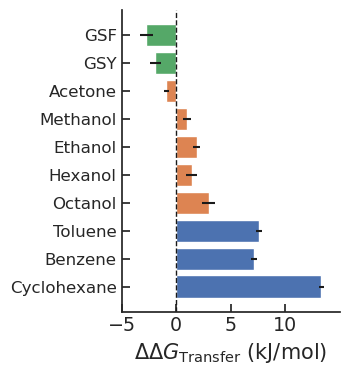

In [11]:
fig, ax = plt.subplots(figsize=(3.75,4))
colors = ['C0', 'C0', 'C0', 'C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2']
barh = plt.barh(solv_data_sel['Medium'], solv_data_sel['ΔΔG BAR'], xerr=solv_data_sel['ΔΔG Error BAR'],  color=colors)
ax.axvline(linewidth=1, linestyle='--', color='k')

ax.set_xlabel('$\Delta \Delta G_\mathrm{Transfer}$ (kJ/mol)')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlim(-5,15)
ax.set_xticks(range(-5,15,5))
#plt.gca().invert_yaxis()
plt.yticks(fontsize=12)

plt.tight_layout()
#plt.savefig("figures/ddg_solvents.png", dpi=300, transparent=True)

<>:12: SyntaxWarning: invalid escape sequence '\D'
<>:12: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_2406935/1949620859.py:12: SyntaxWarning: invalid escape sequence '\D'
  ax.set_ylabel('$\Delta \Delta G_\mathrm{Transfer}$ (kJ/mol)')


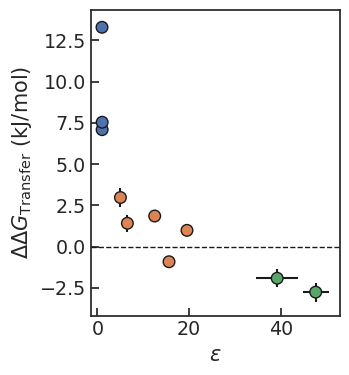

In [12]:
fig, ax = plt.subplots(figsize=(3.75,4))

ax.errorbar(solv_data_sel['Epsilon'], solv_data_sel['ΔΔG BAR'], \
            xerr=solv_data_sel['Epsilon Err'], yerr=solv_data_sel['ΔΔG Error BAR'], fmt='', ms=5, ecolor='k', linestyle='')

scatter_kwargs = {"zorder": 100}
ax.scatter(solv_data_sel['Epsilon'], solv_data_sel['ΔΔG BAR'], \
            marker='o', c=colors, s=70, edgecolors='k', **scatter_kwargs)

ax.axhline(linewidth=1, linestyle='--', color='k')
ax.set_xlabel(r'$\epsilon$')
ax.set_ylabel('$\Delta \Delta G_\mathrm{Transfer}$ (kJ/mol)')
plt.tight_layout()
#plt.savefig("figures/ddg_solvents_vs_epsilon.png", dpi=300, transparent=True)

In [8]:
solv_data = pd.read_csv("StickersFreeEnergyCalculationsReview.csv")
solv_data

,Medium,Epsilon,Epsilon Err,ΔG Crooks,ΔG BAR,ΔG Jarzynski,ΔΔG Crooks,ΔΔG BAR,ΔΔG Jarzynski,ΔGError BAR,ΔΔG Error BAR
0,Water,98.30000,1.153200,-88.670000,-88.440000,-88.450000,0.000000,0.000000,0.000000,0.180000,NaN
1,Cyclohexane,1.00275,0.000036,-75.170000,-75.280000,-75.280000,13.500000,13.160000,13.170000,0.130000,0.222036
2,Benzene,1.03140,0.000860,-81.620000,-81.650000,-82.000000,7.050000,6.790000,6.450000,0.210000,0.276586
3,Toluene,1.03619,0.000362,-81.270000,-80.950000,-80.790000,7.400000,7.490000,7.660000,0.190000,0.261725
4,Octanol,5.02425,0.134066,-85.510000,-85.660000,-86.270000,3.160000,2.780000,2.180000,0.720000,0.742159
5,Hexanol,6.53606,0.264727,-86.780000,-87.050000,-85.760000,1.890000,1.390000,2.690000,0.540000,0.569210
6,Ethanol,12.49830,0.190409,-87.350000,-87.160000,-87.130000,1.320000,1.280000,1.320000,0.270000,0.324500
7,Methanol,19.54070,0.359612,-87.010000,-87.240000,-87.420000,1.660000,1.200000,1.030000,0.190000,0.261725
8,Acetone,15.62100,0.193018,-89.160000,-89.640000,-89.700000,-0.490000,-1.200000,-1.250000,0.150000,0.234307
9,GSY0,34.80000,4.000000,-91.610000,-91.640000,-91.420000,-2.940000,-3.200000,-2.970000,0.540000,0.569210


In [10]:
selected_solvents = ['Cyclohexane', 'Benzene', 'Toluene', \
                     'Octanol', 'Hexanol', 'Ethanol', 'Methanol', 'Acetone', \
                        'GSF', 'GSY'] 
colors = [ 'C0', 'C0', 'C0', \
          'C1', 'C1', 'C1', 'C1', 'C1', \
            'C2', 'C2'] 

solv_data_sel = solv_data.loc[solv_data['Medium'].isin(selected_solvents)]
solv_data_sel

,Medium,Epsilon,Epsilon Err,ΔG Crooks,ΔG BAR,ΔG Jarzynski,ΔΔG Crooks,ΔΔG BAR,ΔΔG Jarzynski,ΔGError BAR,ΔΔG Error BAR
1,Cyclohexane,1.00275,0.000036,-75.170000,-75.280000,-75.280000,13.500000,13.160000,13.170000,0.130000,0.222036
2,Benzene,1.03140,0.000860,-81.620000,-81.650000,-82.000000,7.050000,6.790000,6.450000,0.210000,0.276586
3,Toluene,1.03619,0.000362,-81.270000,-80.950000,-80.790000,7.400000,7.490000,7.660000,0.190000,0.261725
4,Octanol,5.02425,0.134066,-85.510000,-85.660000,-86.270000,3.160000,2.780000,2.180000,0.720000,0.742159
5,Hexanol,6.53606,0.264727,-86.780000,-87.050000,-85.760000,1.890000,1.390000,2.690000,0.540000,0.569210
6,Ethanol,12.49830,0.190409,-87.350000,-87.160000,-87.130000,1.320000,1.280000,1.320000,0.270000,0.324500
7,Methanol,19.54070,0.359612,-87.010000,-87.240000,-87.420000,1.660000,1.200000,1.030000,0.190000,0.261725
8,Acetone,15.62100,0.193018,-89.160000,-89.640000,-89.700000,-0.490000,-1.200000,-1.250000,0.150000,0.234307
12,GSY,34.80000,4.000000,-91.046667,-91.236667,-91.266667,-2.376667,-2.796667,-2.816667,0.505206,0.539753
16,GSF,48.80000,0.600000,-91.113333,-90.993333,-90.546667,-2.443333,-2.553333,-2.096667,0.410000,0.447772


<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_473849/2914756083.py:5: SyntaxWarning: invalid escape sequence '\D'
  ax.set_xlabel('$\Delta \Delta G_\mathrm{Transfer}$ (kJ/mol)')


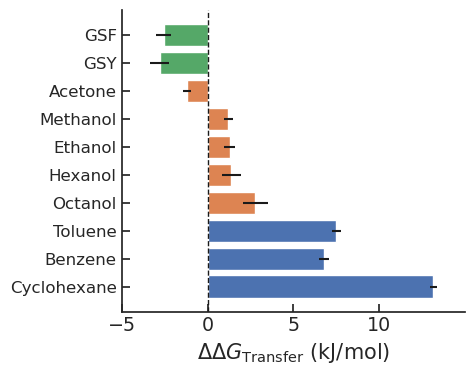

In [11]:
fig, ax = plt.subplots(figsize=(5,4))
barh = plt.barh(solv_data_sel['Medium'], solv_data_sel['ΔΔG BAR'], xerr=solv_data_sel['ΔΔG Error BAR'],  color=colors)
ax.axvline(linewidth=1, linestyle='--', color='k')

ax.set_xlabel('$\Delta \Delta G_\mathrm{Transfer}$ (kJ/mol)')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlim(-5,15)
ax.set_xticks(range(-5,15,5))
#plt.gca().invert_yaxis()
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig("figures/ddg_solvents_rev.png", dpi=300, transparent=True)

<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_2406935/2273762312.py:13: SyntaxWarning: invalid escape sequence '\D'
  ax.set_ylabel('$\Delta \Delta G_\mathrm{Transfer}$ (kJ/mol)')


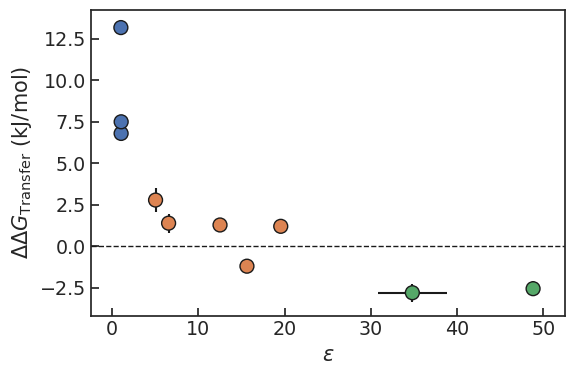

In [19]:
fig, ax = plt.subplots(figsize=(6,4))

ax.errorbar(solv_data_sel['Epsilon'], solv_data_sel['ΔΔG BAR'], \
            xerr=solv_data_sel['Epsilon Err'], yerr=solv_data_sel['ΔΔG Error BAR'], fmt='', ecolor='k', linestyle='')

scatter_kwargs = {"zorder": 100}
ax.scatter(solv_data_sel['Epsilon'], solv_data_sel['ΔΔG BAR'], \
            marker='o', c=colors, s=100, edgecolors='k', **scatter_kwargs)

ax.set_xlim(-2.5, 52.5)
ax.axhline(linewidth=1, linestyle='--', color='k')
ax.set_xlabel(r'$\epsilon$')
ax.set_ylabel('$\Delta \Delta G_\mathrm{Transfer}$ (kJ/mol)')
plt.tight_layout()
plt.savefig("figures/ddg_solvents_vs_epsilon_rev.png", dpi=300, transparent=True)